# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('data/retailmax.csv')

# Mostrar información básica del dataset
print("Forma del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

Forma del dataset: (200, 5)

Primeras filas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory 

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

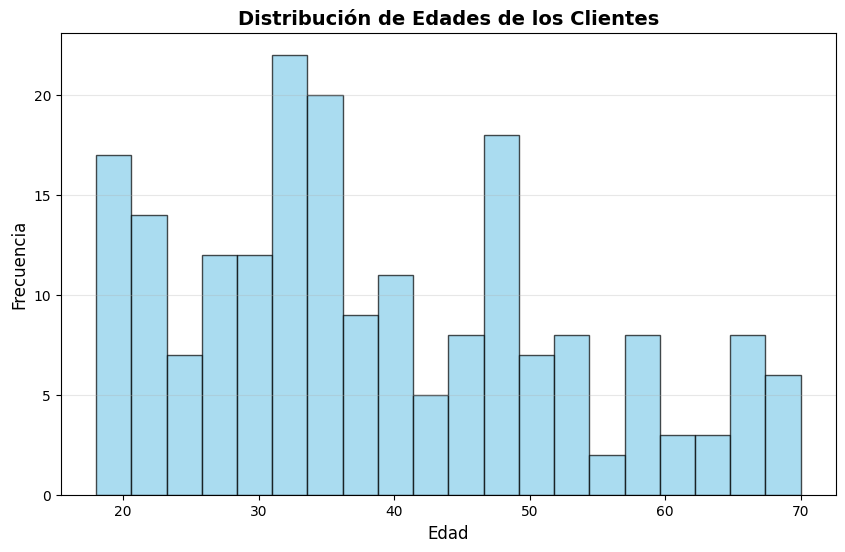

Edad promedio: 38.85 años
Edad mediana: 36.00 años
Edad mínima: 18 años
Edad máxima: 70 años


In [2]:
# Histograma de la distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Edades de los Clientes', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Estadísticas descriptivas
print(f"Edad promedio: {df['Age'].mean():.2f} años")
print(f"Edad mediana: {df['Age'].median():.2f} años")
print(f"Edad mínima: {df['Age'].min()} años")
print(f"Edad máxima: {df['Age'].max()} años")

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

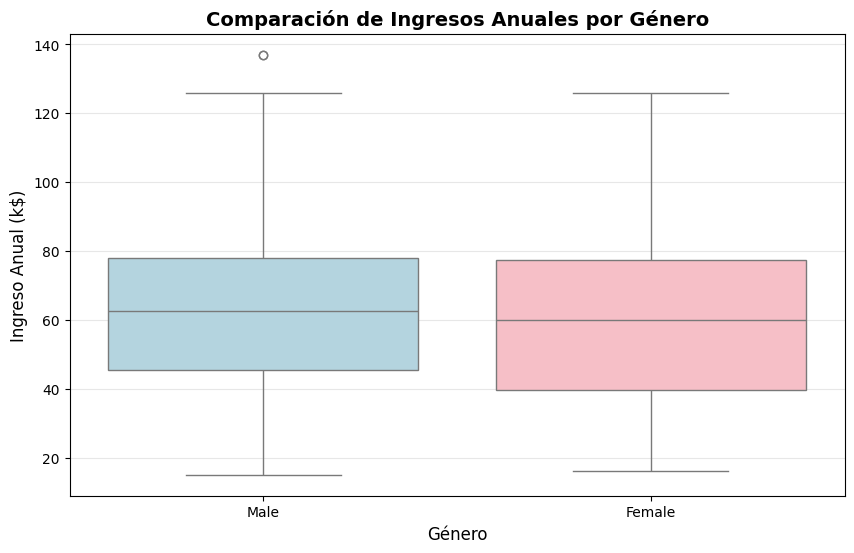

Estadísticas de Ingreso Anual por Género:
        count       mean        std   min    25%   50%    75%    max
Gender                                                              
Female  112.0  59.250000  26.011952  16.0  39.75  60.0  77.25  126.0
Male     88.0  62.227273  26.638373  15.0  45.50  62.5  78.00  137.0


In [3]:
# Boxplot de ingresos anuales por género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette=['lightblue', 'lightpink'])
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ingreso Anual (k$)', fontsize=12)
plt.title('Comparación de Ingresos Anuales por Género', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Estadísticas por género
print("Estadísticas de Ingreso Anual por Género:")
print(df.groupby('Gender')['Annual Income (k$)'].describe())

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

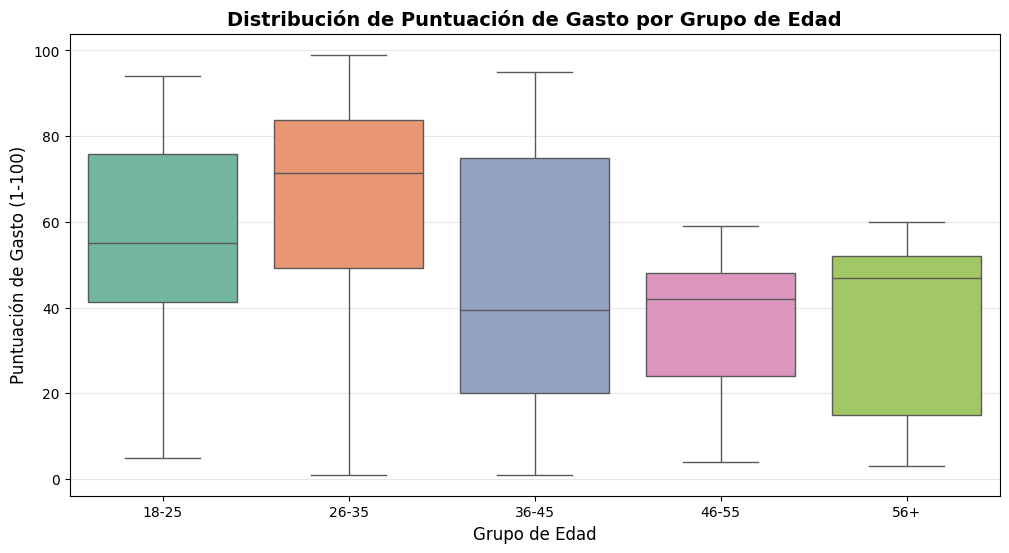

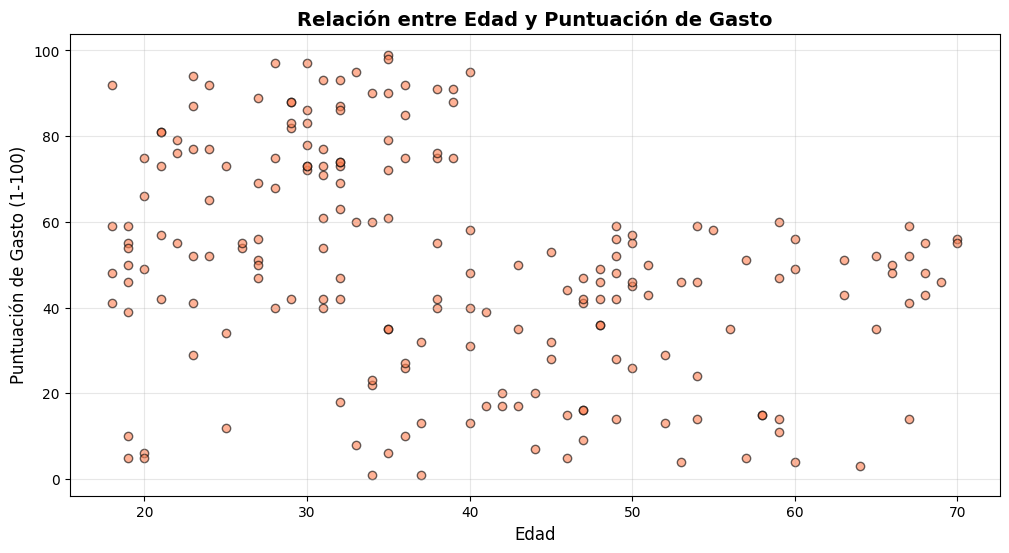

In [4]:
# Crear grupos de edad
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                          labels=['18-25', '26-35', '36-45', '46-55', '56+'])

# Gráfica de cajas por grupo de edad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Spending Score (1-100)', data=df, palette='Set2')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)
plt.title('Distribución de Puntuación de Gasto por Grupo de Edad', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Scatter plot para ver la relación continua
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.6, c='coral', edgecolors='black')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)
plt.title('Relación entre Edad y Puntuación de Gasto', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

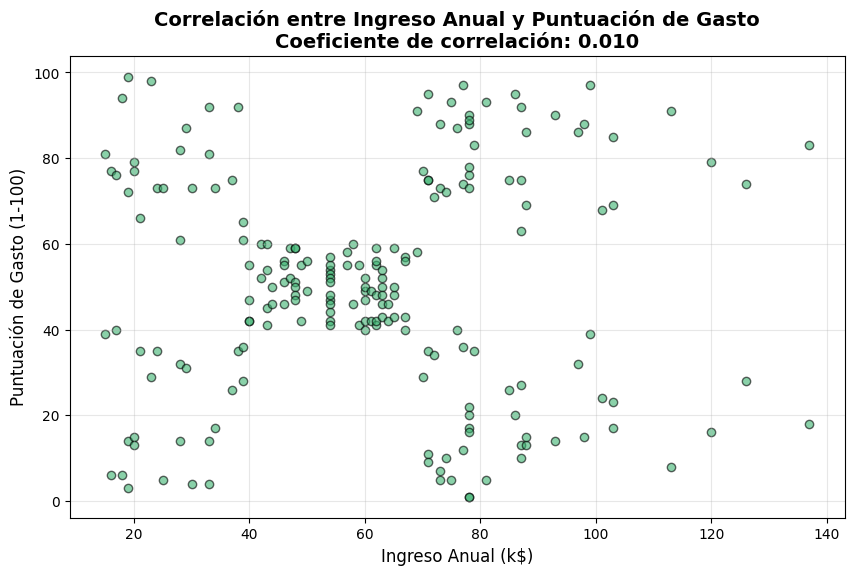

Coeficiente de correlación de Pearson: 0.0099
Interpretación: Correlación débil o nula


In [5]:
# Calcular correlación
correlacion = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])

# Gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            alpha=0.6, c='mediumseagreen', edgecolors='black')
plt.xlabel('Ingreso Anual (k$)', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)
plt.title(f'Correlación entre Ingreso Anual y Puntuación de Gasto\nCoeficiente de correlación: {correlacion:.3f}', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")

# Interpretación
if abs(correlacion) < 0.3:
    print("Interpretación: Correlación débil o nula")
elif abs(correlacion) < 0.7:
    print("Interpretación: Correlación moderada")
else:
    print("Interpretación: Correlación fuerte")

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

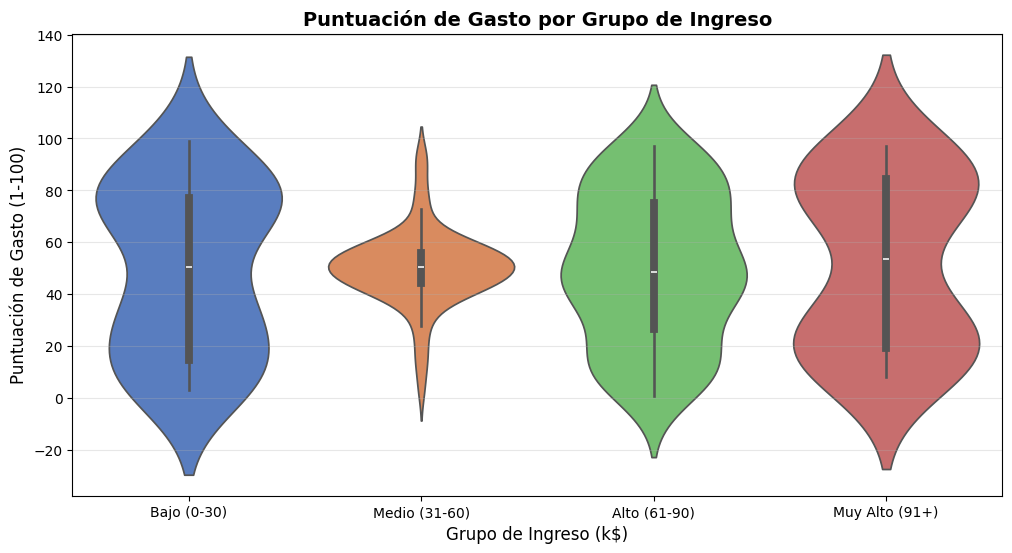

Estadísticas de Spending Score por Grupo de Ingreso:
                count      mean        std  min    25%   50%    75%   max
Income Group                                                             
Bajo (0-30)      32.0  49.65625  32.438139  3.0  14.75  50.5  77.00  99.0
Medio (31-60)    66.0  50.19697  14.539304  4.0  44.25  50.5  55.75  92.0
Alto (61-90)     80.0  49.92500  28.420787  1.0  26.75  48.5  75.00  97.0
Muy Alto (91+)   22.0  52.00000  32.693381  8.0  19.25  53.5  84.50  97.0


In [6]:
# Crear grupos de ingresos
df['Income Group'] = pd.cut(df['Annual Income (k$)'], 
                             bins=[0, 30, 60, 90, 150], 
                             labels=['Bajo (0-30)', 'Medio (31-60)', 'Alto (61-90)', 'Muy Alto (91+)'])

# Gráfica de violín
plt.figure(figsize=(12, 6))
sns.violinplot(x='Income Group', y='Spending Score (1-100)', data=df, palette='muted')
plt.xlabel('Grupo de Ingreso (k$)', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)
plt.title('Puntuación de Gasto por Grupo de Ingreso', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Estadísticas por grupo de ingreso
print("Estadísticas de Spending Score por Grupo de Ingreso:")
print(df.groupby('Income Group')['Spending Score (1-100)'].describe())

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

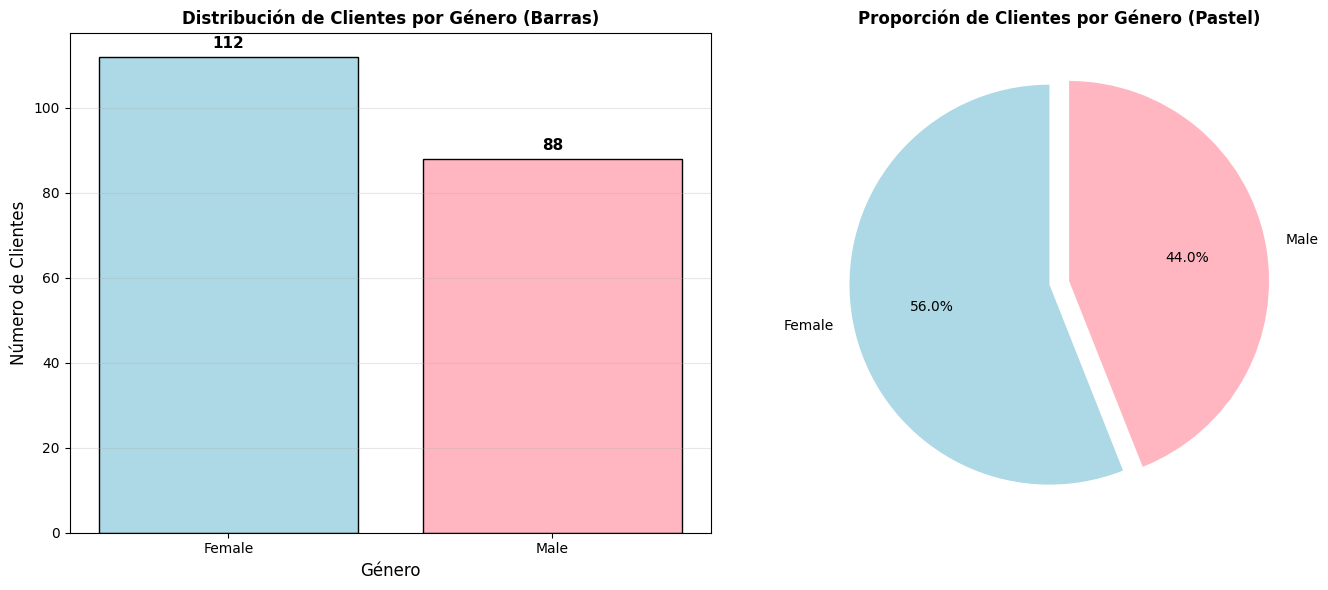

Total de clientes: 200

Distribución por género:
Female: 112 (56.0%)
Male: 88 (44.0%)


In [7]:
# Contar clientes por género
gender_counts = df['Gender'].value_counts()

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de barras
axes[0].bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink'], edgecolor='black')
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Número de Clientes', fontsize=12)
axes[0].set_title('Distribución de Clientes por Género (Barras)', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(gender_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', fontsize=11, fontweight='bold')

# Gráfica de pastel
colors = ['lightblue', 'lightpink']
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Proporción de Clientes por Género (Pastel)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total de clientes: {len(df)}")
print(f"\nDistribución por género:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count} ({count/len(df)*100:.1f}%)")

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

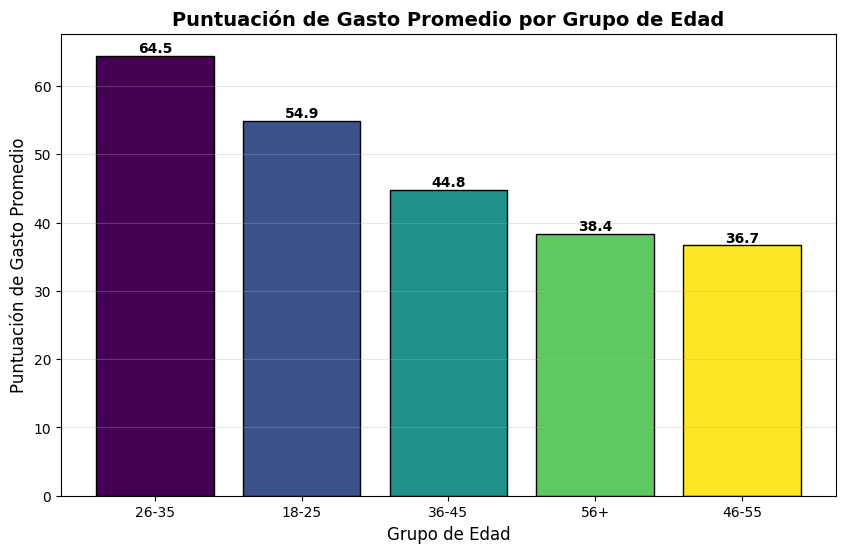

Puntuación de Gasto Promedio por Grupo de Edad:
Age Group
26-35    64.450000
18-25    54.947368
36-45    44.833333
56+      38.379310
46-55    36.702703
Name: Spending Score (1-100), dtype: float64


In [8]:
# Calcular el gasto promedio por grupo de edad
spending_by_age = df.groupby('Age Group')['Spending Score (1-100)'].mean().sort_values(ascending=False)

# Gráfica de barras
plt.figure(figsize=(10, 6))
colors_palette = plt.cm.viridis(np.linspace(0, 1, len(spending_by_age)))
bars = plt.bar(spending_by_age.index, spending_by_age.values, color=colors_palette, edgecolor='black')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Puntuación de Gasto Promedio', fontsize=12)
plt.title('Puntuación de Gasto Promedio por Grupo de Edad', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

print("Puntuación de Gasto Promedio por Grupo de Edad:")
print(spending_by_age)

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

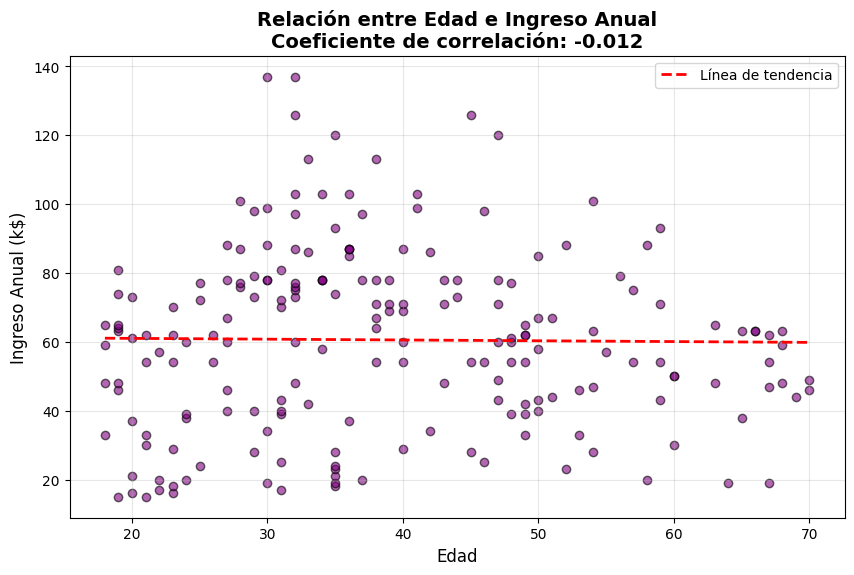

Coeficiente de correlación de Pearson: -0.0124


In [9]:
# Calcular correlación entre edad e ingreso
correlacion_age_income = df['Age'].corr(df['Annual Income (k$)'])

# Gráfica de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], alpha=0.6, c='purple', edgecolors='black')

# Agregar línea de tendencia
z = np.polyfit(df['Age'], df['Annual Income (k$)'], 1)
p = np.poly1d(z)
plt.plot(df['Age'].sort_values(), p(df['Age'].sort_values()), 
         "r--", linewidth=2, label=f'Línea de tendencia')

plt.xlabel('Edad', fontsize=12)
plt.ylabel('Ingreso Anual (k$)', fontsize=12)
plt.title(f'Relación entre Edad e Ingreso Anual\nCoeficiente de correlación: {correlacion_age_income:.3f}', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Coeficiente de correlación de Pearson: {correlacion_age_income:.4f}")

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

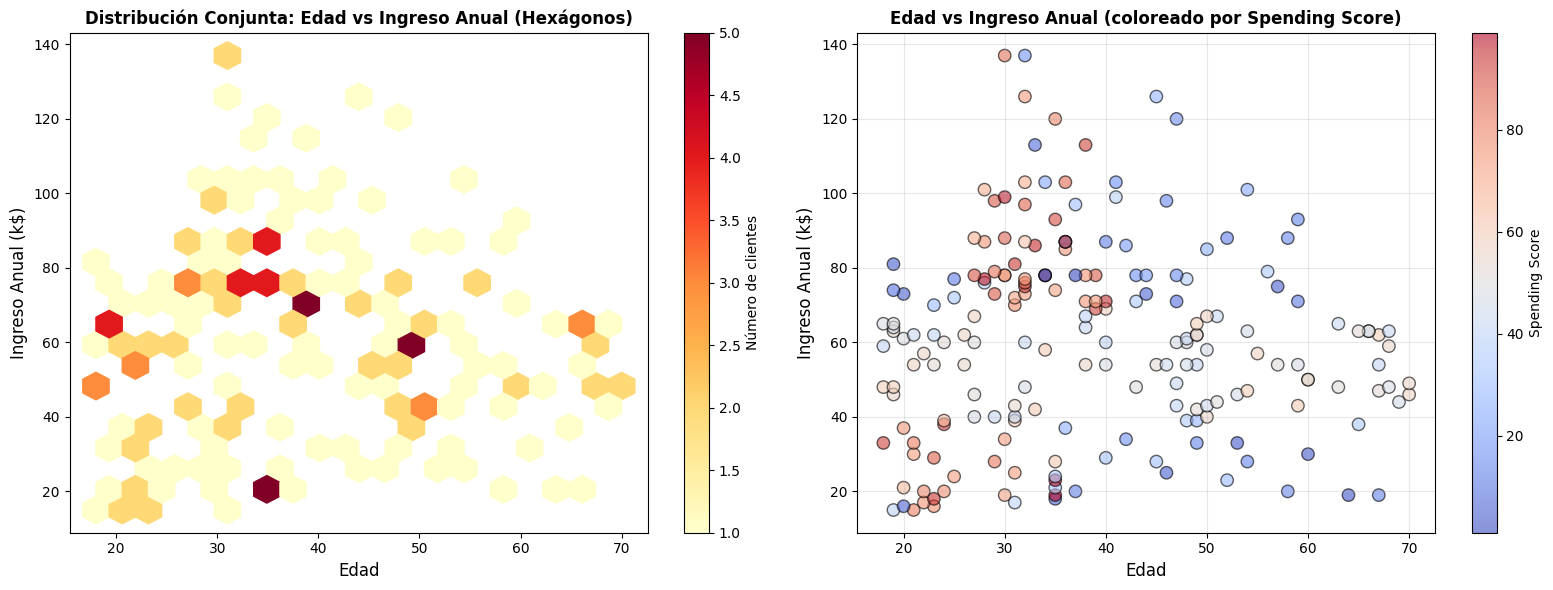

In [10]:
# Crear visualización con hexbin
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hexbin plot
hb = axes[0].hexbin(df['Age'], df['Annual Income (k$)'], gridsize=20, cmap='YlOrRd', mincnt=1)
axes[0].set_xlabel('Edad', fontsize=12)
axes[0].set_ylabel('Ingreso Anual (k$)', fontsize=12)
axes[0].set_title('Distribución Conjunta: Edad vs Ingreso Anual (Hexágonos)', fontsize=12, fontweight='bold')
plt.colorbar(hb, ax=axes[0], label='Número de clientes')

# Scatter plot con densidad de color
axes[1].scatter(df['Age'], df['Annual Income (k$)'], 
                c=df['Spending Score (1-100)'], cmap='coolwarm', 
                alpha=0.6, edgecolors='black', s=80)
axes[1].set_xlabel('Edad', fontsize=12)
axes[1].set_ylabel('Ingreso Anual (k$)', fontsize=12)
axes[1].set_title('Edad vs Ingreso Anual (coloreado por Spending Score)', fontsize=12, fontweight='bold')
cbar = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar.set_label('Spending Score', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

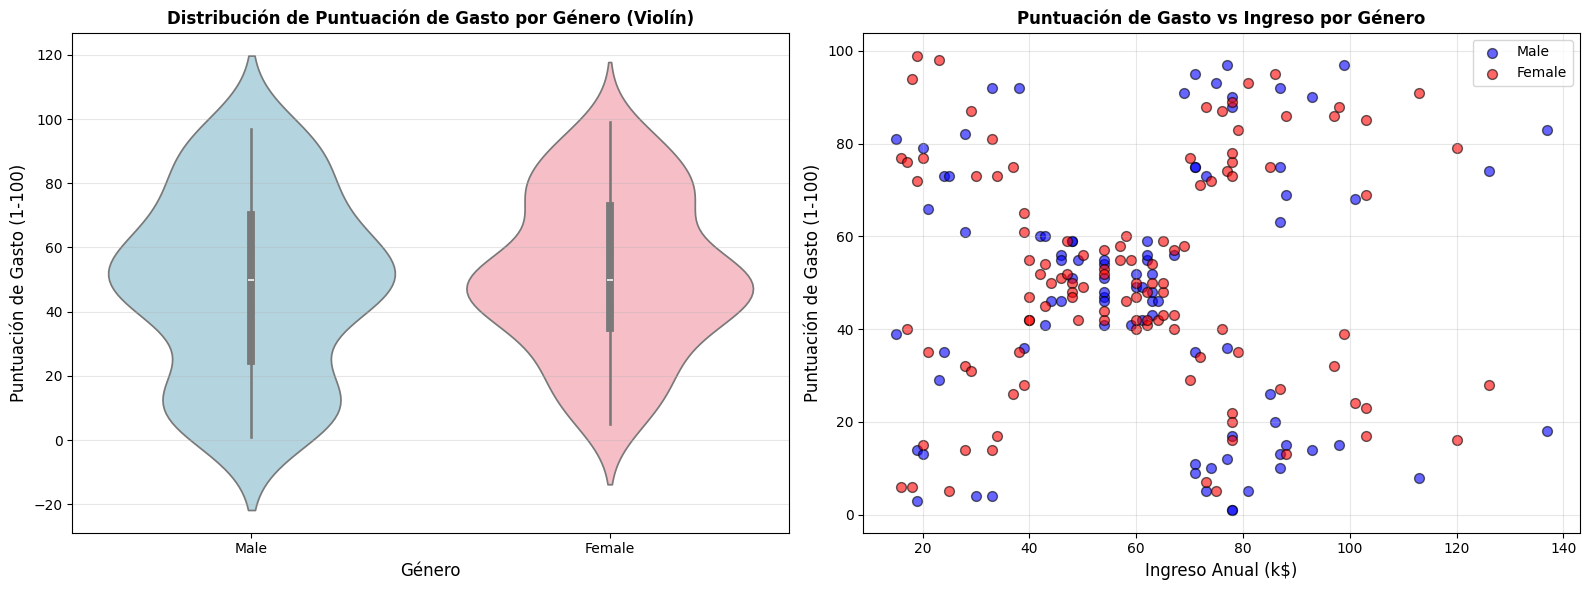

Estadísticas de Spending Score por Género:
        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


In [11]:
# Crear visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Violin plot
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, 
               palette=['lightblue', 'lightpink'], ax=axes[0])
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Puntuación de Gasto (1-100)', fontsize=12)
axes[0].set_title('Distribución de Puntuación de Gasto por Género (Violín)', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Scatter plot por género
for gender, color in zip(['Male', 'Female'], ['blue', 'red']):
    gender_data = df[df['Gender'] == gender]
    axes[1].scatter(gender_data['Annual Income (k$)'], 
                   gender_data['Spending Score (1-100)'],
                   label=gender, alpha=0.6, c=color, edgecolors='black', s=50)

axes[1].set_xlabel('Ingreso Anual (k$)', fontsize=12)
axes[1].set_ylabel('Puntuación de Gasto (1-100)', fontsize=12)
axes[1].set_title('Puntuación de Gasto vs Ingreso por Género', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas por género
print("Estadísticas de Spending Score por Género:")
print(df.groupby('Gender')['Spending Score (1-100)'].describe())